# Advanced Analytics in Fundraising - Predictive and Descriptive Analytics 
Fernando Delgado, Mario Serrano and Harikrishnan Gopalakrishnan

## Feature Selection and Models
**Workflow stages:**

The following notebook goes through the following stages: 

1. Data Scaling and Partition
2. Feature Selection
3. Model construction
4. Model evaluation
5. Business Case - How much would our model have improved the performance of campagins?
6. Model Prediction with new campagin

In [1]:
# Data Science
import numpy as np
import pandas as pd
import statistics as st

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from scipy.stats          import pearsonr

from sklearn.model_selection import train_test_split

In [2]:
#Read Datasets
df_train = pd.read_csv('../data/interim/Train Set Donors.csv')
df_test = pd.read_csv('../data/interim/Test Set Donors.csv')

In [3]:
df_train.columns

Index(['donorID', 'province', 'region', 'gender', 'language', 'Flanders',
       'Wallonia', 'Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant',
       'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Namur', 'Walloon Brabant',
       'West Flanders', 'number_don', 'uni_campaigns', 'sum_amount',
       'min_amount', 'max_amount', 'avg_don', 'ratio_don', 'donated_more_one',
       'donated_more_five', 'more_30', 'target_6169', 'sup_95', 'rec_d',
       'rec_m', 'F', 'M', 'RFM_Score', 'RFM_Level', 'don_last_six_mon',
       'don_last_year', 'don_last_3_years', 'age', 'age_group'],
      dtype='object')

## Data Scaling and Partition

In [4]:
#scale the data https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaled_base_table = pd.DataFrame(scaler.fit_transform(df_train.drop(['donorID'],axis=1)), columns=df_train.drop(['donorID'],axis=1).columns)

#scaled_base_table.head()


In [5]:
#Define features and target
features = list(df_train.drop(["target_6169"],1).columns)
target = 'target_6169'

# split data in train and test
X, y = df_train[features], df_train[target]
trainingSet, testSet, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state=50)

trainingSet.head()

,donorID,province,region,gender,language,Flanders,Wallonia,Antwerp,Brussels,East Flanders,...,rec_m,F,M,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_3_years,age,age_group
8966,110739,Limburg,Flanders,0,1,1,0,0,0,0,...,143.0,0.0,0.0,1.0,4,0.0,0.0,0.0,44,4
11342,113580,West Flanders,Flanders,0,1,1,0,0,0,0,...,124.0,0.0,0.0,2.0,3,0.0,0.0,0.0,40,4
13677,116309,West Flanders,Flanders,1,1,1,0,0,0,0,...,111.0,0.0,0.0,2.0,3,0.0,0.0,0.0,50,5
12882,115399,West Flanders,Flanders,1,1,1,0,0,0,0,...,132.0,0.0,0.0,2.0,3,0.0,0.0,0.0,46,4
1368,101658,Flemish Brabant,Flanders,0,1,1,0,0,0,0,...,148.0,0.0,0.0,1.0,4,0.0,0.0,0.0,55,5


In [6]:
#pip install -U imbalanced-learn
#we are going to try with oversampling

#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(trainingSet, y_train)


In [7]:
print(trainingSet.shape)
#print(X_resampled.shape)

print(y_train.shape)
#print(y_resampled.shape)


(24406, 40)
(24406,)


In [8]:
testSet.shape

(10460, 40)

## Feature Selection 
Using an Univariate feature selection we decide the best features to avoid overfitting. In this case, we use a p-value of 0.05 to choose the top features:

In [9]:
selectedFeatures = []

for column in trainingSet[features].columns:
    if column not in (['province','region']):
        (pearson,pvalue) = pearsonr(trainingSet[column],y_train)
        print(f"{column} - p-value = {pvalue} - selected : {1 if pvalue < 0.05 else 0}")
        if pvalue < 0.05:
            selectedFeatures.append(column)

donorID - p-value = 0.9453039534329618 - selected : 0
gender - p-value = 1.195648362539945e-66 - selected : 1
language - p-value = 0.06195637651613625 - selected : 0
Flanders - p-value = 0.04345210471028589 - selected : 1
Wallonia - p-value = 0.10153177770206889 - selected : 0
Antwerp - p-value = 0.9193180545788687 - selected : 0
Brussels - p-value = 0.263922294531239 - selected : 0
East Flanders - p-value = 0.31121908900626255 - selected : 0
Flemish Brabant - p-value = 0.4724788579911498 - selected : 0
Hainaut - p-value = 0.019104521345677947 - selected : 1
Liege - p-value = 0.7691197515628576 - selected : 0
Limburg - p-value = 0.11572057769512396 - selected : 0
Luxembourg - p-value = 0.86222896202108 - selected : 0
Namur - p-value = 0.5565141370663719 - selected : 0
Walloon Brabant - p-value = 0.05996645822825111 - selected : 0
West Flanders - p-value = 0.2970966013211699 - selected : 0
number_don - p-value = 0.8464480004453857 - selected : 0
uni_campaigns - p-value = 0.7387028425068

In [10]:
selectedFeatures

['gender',
 'Flanders',
 'Hainaut',
 'donated_more_one',
 'more_30',
 'rec_d',
 'rec_m',
 'RFM_Score',
 'age',
 'age_group']

## Model Construction

Now we are ready to train a model and predict the required solution. We want to identify relationship between output (Donated or not) with other variables or features. First we will run the AUC score of the following models to choose the best models to construct:
- Decision Tree
- Logistic Regression
- Random Forrest
- Boosted Tree
- Support Vector Machines
- Neural Network
- KNN or k-Nearest Neighbors

In [35]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }
performances = {}


In [36]:
for model in models:
    models[model].fit(trainingSet[selectedFeatures],y_train)


In [37]:
for model in models:
    predictions   = models[model].predict(testSet[selectedFeatures])
    probabilities = pd.DataFrame(models[model].predict_proba(testSet[selectedFeatures]))[1]
    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities))
    performances[model] = {"Accuracy":accuracy,"AUC":auc}


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
pd.DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.945793,0.972753,0.971511,0.972945,0.972753,0.972753,0.972753
AUC,0.512777,0.746314,0.662874,0.761087,0.452521,0.710571,0.531139


## Model Evaluation

In [16]:
# Gradient Classifier
boostedTree  = GradientBoostingClassifier(n_estimators=100, learning_rate= 1, max_depth=1, random_state=0)
boostedTree = boostedTree.fit(trainingSet[selectedFeatures].values, y_train)

# predict probabilities
pred_train = boostedTree.predict_proba(trainingSet[selectedFeatures].values)
pred_test = boostedTree.predict_proba(testSet[selectedFeatures].values)

# evaluate predictions
acc_train = accuracy_score(y_train, np.argmax(pred_train, axis=1))
acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))
aucTraining = roc_auc_score(y_train,pred_train[:,1])
aucTest = roc_auc_score(y_test,pred_test[:,1])
print(f"Accuracy Train:\tACC={acc_train:.4f}")
print(f"Accuracy Test:\tACC={acc_test:.4f}")
print(f"AUC Train:\tACC={aucTraining:.4f}")
print(f"AUC Test:\tACC={aucTest:.4f}")

Accuracy Train:	ACC=0.9729
Accuracy Test:	ACC=0.9729
AUC Train:	ACC=0.7715
AUC Test:	ACC=0.7611


## Test Model on Second Campaign

In [17]:
# test on data
#scaler = MinMaxScaler()
#scaled_test = pd.DataFrame(scaler.fit_transform(df_test.drop(['donorID'],axis=1)), columns=df_test.drop(['donorID'],axis=1).columns)
#scaled_test.head()

target =df_test['target_7244']
# predict probabilities
pred_test = boostedTree.predict_proba(df_test[selectedFeatures].values)
aucTest = roc_auc_score(target,pred_test[:,1])
print(f"AUC Test:\tACC={aucTest:.4f}")

AUC Test:	ACC=0.6438


## Business Case
How much would our model have improved the performance of campagins?

In [18]:
pred_test

array([[0.96897951, 0.03102049],
       [0.98134703, 0.01865297],
       [0.9699527 , 0.0300473 ],
       ...,
       [0.93467281, 0.06532719],
       [0.99165517, 0.00834483],
       [0.99473078, 0.00526922]])

We add our calculated probability of donation to our database

In [19]:
df_test['proba_donation']= pred_test[:,1]
df_test.head()

,donorID,province,region,gender,language,Flanders,Wallonia,Antwerp,Brussels,East Flanders,...,F,M,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_3_years,age,age_group,proba_donation
0,100001,Flemish Brabant,Flanders,0,1,1,0,0,0,0,...,0.0,0.0,2.0,3,0.0,0.0,0.0,51,5,0.031020
1,100002,Antwerp,Flanders,1,1,1,0,1,0,0,...,0.0,0.0,3.0,3,0.0,0.0,0.0,66,6,0.018653
2,100008,Flemish Brabant,Flanders,1,0,1,0,0,0,0,...,0.0,0.0,2.0,3,0.0,0.0,0.0,81,8,0.030047
3,100009,Brussels,Brussels,1,0,0,0,0,1,0,...,0.0,0.0,2.0,3,0.0,0.0,0.0,86,8,0.034973
4,100010,Brussels,Brussels,1,0,0,0,0,1,0,...,0.0,0.0,3.0,3,0.0,0.0,0.0,35,3,0.005269


In [20]:
df_test = df_test.sort_values('proba_donation', ascending = False)
df_test.shape

(25642, 42)

By subgrouping everything into 5 groups, we can calculate the probability of donation by group

In [21]:
p20 = int(round(25642*0.2,0))
p40 = int(round(25642*0.4,0))
p60 = int(round(25642*0.6,0))
p80 = int(round(25642*0.8,0))
p100 = 25642


In [22]:
prob20 = df_test.iloc[0:p20,:]
prob40 = df_test.iloc[0:p40,:]
prob60 = df_test.iloc[0:p60,:]
prob80 = df_test.iloc[0:p80,:]
prob100 = df_test.iloc[0:p100,:]


This is the calculated probability of donation

In [23]:
print(prob20['proba_donation'].sum()/p20)
print(prob40['proba_donation'].sum()/p40)
print(prob60['proba_donation'].sum()/p60)
print(prob80['proba_donation'].sum()/p80)
print(prob100['proba_donation'].sum()/p100)



0.07592165448378686
0.05233349991796106
0.04041418748986919
0.03265148026404584
0.02714898113783966


This is the real donation rate

In [24]:
#real 
print(prob20['target_7244'].sum()/p20)
print(prob40['target_7244'].sum()/p40)
print(prob60['target_7244'].sum()/p60)
print(prob80['target_7244'].sum()/p80)
print(prob100['target_7244'].sum()/p100)



0.01579563182527301
0.01286926001754899
0.011179720506987326
0.009700692210197913
0.008462678418220107


**Following, we calculate our lift, cumulative gains and donation probability in the annexed excel file**

### Profiling
based on our predicted probability, we can profile our donors to identify what is our -role- donor.

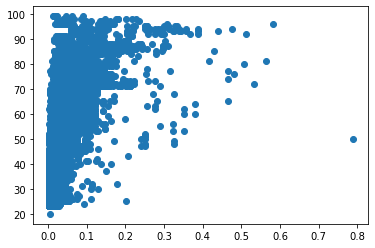

In [25]:
#Take a look at the Age range 

plt.scatter(df_test['proba_donation'],df_test['age'])

Splitting our database into deciles we can observe our mean age by group

In [26]:
df_test['proba_group'] = df_test['proba_donation']//0.1
df_test.groupby('proba_group')['age','proba_donation'].agg('mean')

<ipython-input-26-80e414443fd8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_test.groupby('proba_group')['age','proba_donation'].agg('mean')


,age,proba_donation
proba_group,,
0.0,47.774021,0.022488
1.0,74.134921,0.126303
2.0,81.250000,0.238444
3.0,81.468750,0.336603
4.0,80.625000,0.454920
5.0,84.200000,0.538484
7.0,50.000000,0.788123


We decide to Profile all of those customer that have a 40% or more probability of donating

In [27]:
#we are going to select for more than 40% of probability

df_test['most_prob'] = 0
df_test.loc[df_test['proba_donation']>=0.4,'most_prob'] = 1

In [28]:
df_test['most_prob'].sum()/df_test.shape[0]

0.000545979252788394

In [29]:
df_test.shape[0]

25642

We can observe the median age for our probable donors is 92

In [30]:
df_test.groupby('most_prob')['age'].agg(['mean','min','median'])

,mean,min,median
most_prob,,,
0,48.740011,20,47.0
1,79.714286,50,80.5


In [31]:
df_test.groupby('most_prob')['gender'].agg('sum')

most_prob
0    15440
1        2
Name: gender, dtype: int64

Grouped by gender, the majority are female

In [32]:
pd.pivot_table(df_test,values='donorID',index='most_prob',columns='gender',aggfunc='count',margins=True)

gender,0,1,All
most_prob,,,
0,10188,15440,25628
1,12,2,14
All,10200,15442,25642


In [33]:
df_test.head(1)

,donorID,province,region,gender,language,Flanders,Wallonia,Antwerp,Brussels,East Flanders,...,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_3_years,age,age_group,proba_donation,proba_group,most_prob
2473,105428,West Flanders,Flanders,0,1,1,0,0,0,0,...,5.0,2,1.0,1.0,1.0,50,5,0.788123,7.0,1


Grouped by preferred language, the majority speak Dutch

In [34]:
pd.pivot_table(df_test,values='donorID',index='most_prob',columns='language',aggfunc='count',margins=True)


language,0,1,All
most_prob,,,
0,2294,23334,25628
1,1,13,14
All,2295,23347,25642


##  Model Prediction with new campagin